In [104]:
import pandas as pd
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
import math

# plot inline figures
%matplotlib inline 

# to make saved pdf figures have real text, not outlines
matplotlib.rcParams['pdf.fonttype'] = 42 
matplotlib.rcParams['ps.fonttype'] = 42

In [105]:
############# THINGS TO MODIFY

# Read into pandas DataFrames
datapath="/Users/zanejobe/Dropbox/_CoRE/Rosie_Zane_working/Seaborn/"
filename="PLDataLOGGED_TH_TR_OneGroup.txt"

# specify export file name
figname="PL_TH_TR_Data"

# axis labels
xlab='thickness'
ylab='thinning rate'


In [160]:
# import data
df = pd.read_csv(datapath + filename, header=None, sep='  ', names=['x', 'y', 'group']) # throws a warning because the file is delimited by multiple spaces, and python expects only 1 space

xlim=[math.floor(df.x.min()),math.ceil(df.x.max())]
ylim=[math.floor(df.y.min()),math.ceil(df.y.max())]

# read in the RGB values that Rosie prefers
rgb_val = pd.read_csv(datapath + 'RGB_values.txt', header=None, sep=' ',names=['r','g','b','group'])
rgb_val.r = rgb_val.r/255
rgb_val.g = rgb_val.g/255
rgb_val.b = rgb_val.b/255

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  


0    1
1    2
2    3
Name: group, dtype: int64

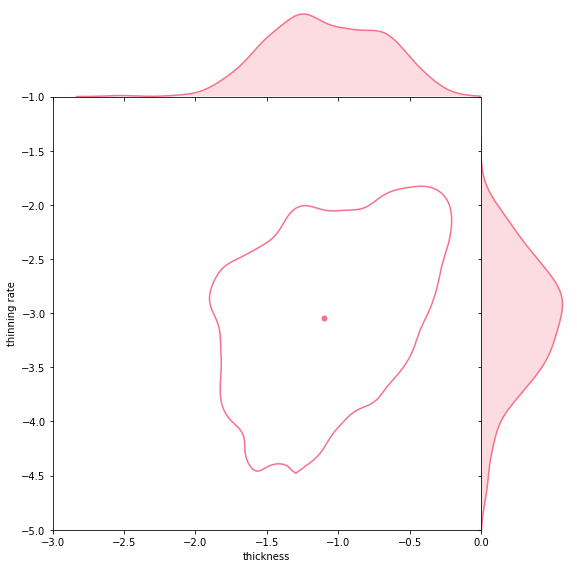

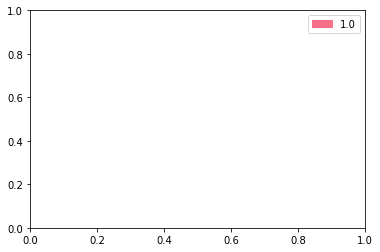

In [142]:
def cmap_from_color(color, min_alpha=0.1, max_alpha=1, n_levels=10):
    color = matplotlib.colors.colorConverter.to_rgba(color, alpha=max_alpha)
    transparent = matplotlib.colors.colorConverter.to_rgba(color, alpha=0.0)
    c_list = [color] + [transparent] * (n_levels - 1)
    return matplotlib.colors.LinearSegmentedColormap.from_list('temp_cmap', c_list, n_levels)

## NEED to figure out how to only plot 90% contour

for group in df.groupby("group"):
    sns.set_palette('husl', n_colors=df['group'].unique().size)    
    g = sns.JointGrid("x", "y", df, size=8, space=0)
    patches = []
    
    for group, values in df.groupby("group"):
        
        # plot the marginal KDEs for x and y
        sns.kdeplot(values["x"], ax=g.ax_marg_x, shade=True, legend=False)
        ax = sns.kdeplot(values["y"], ax=g.ax_marg_y, vertical=True, shade=True, legend=False)
        
        color = ax.get_lines()[-1].get_color()
        patches.append(mpatches.Patch(color=color, label=group))
        
        # now plot the 2D contour map
        sns.kdeplot(values["x"], values["y"], ax=g.ax_joint, cmap=cmap_from_color(color))
        g.ax_joint.scatter(values.x.median(), values.y.median(), color=color, s=25)
    
    g.set_axis_labels(xlabel=xlab, ylabel=ylab)
    g.ax_joint.set_xlim(xlim)
    g.ax_joint.set_ylim(ylim)
    
    # save as pdf
    plt.savefig(figname + ".pdf", transparent=True)
    plt.show()
    
    plt.legend(handles=patches)
    plt.savefig(figname + 'LEGEND.png')
    plt.show()